# Causal Inference on Time Series

### Importing Dependencies 

In [1]:
# Data Manipulation
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (15, 6)
import warnings
warnings.filterwarnings('ignore')

# Memory otimization
import gc
gc.enable()

# Statistical packages - to download CausalImpact: !pip install pycausalimpact
from causalimpact import CausalImpact
from statsmodels.tsa.arima_process import arma_generate_sample

In [2]:
# random seed to ensure reproducibility
np.random.seed(667)

x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)

y[71:100] = y[71:100] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])

In [3]:
print(data.shape)
data.head()

(100, 2)


,y,x1
0,118.678055,98.723209
1,120.455702,99.943396
2,117.208751,97.980867
3,120.475916,100.435896
4,120.328507,99.362127


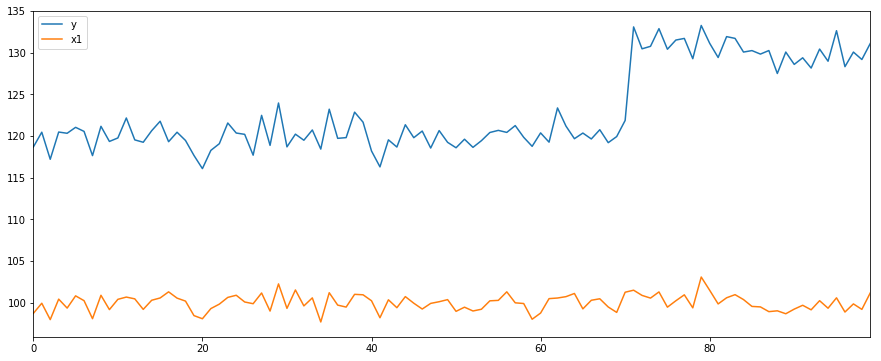

In [4]:
data.plot()

### Analysis

In [5]:
pre_period = [0,69]
post_period = [71,99]

In [ ]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
ci.plot()

In [6]:
impact = CausalImpact(data, pre_period, post_period)
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    130.4              3782.3
Prediction (s.d.)         120.2 (0.2)        3484.9 (6.9)
95% CI                    [119.7, 120.6]     [3471.3, 3498.4]

Absolute effect (s.d.)    10.3 (0.2)         297.3 (6.9)
95% CI                    [9.8, 10.7]        [283.9, 311.0]

Relative effect (s.d.)    8.5% (0.2%)        8.5% (0.2%)
95% CI                    [8.1%, 8.9%]       [8.1%, 8.9%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


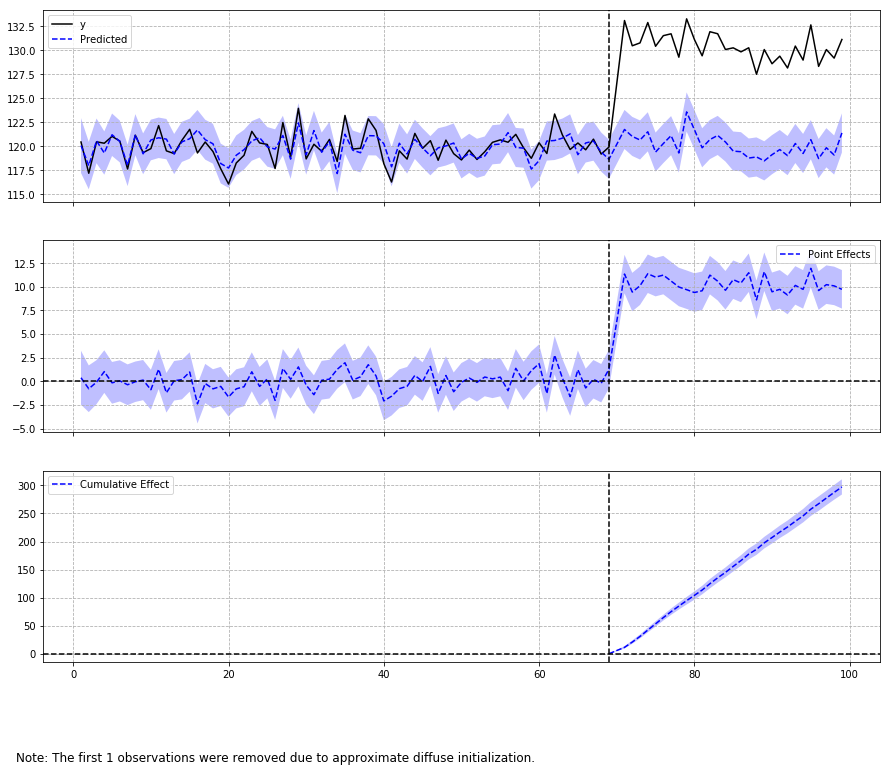

In [7]:
impact.plot()

In [2]:
ibov = pd.read_csv('^BVSP.csv')
print(ibov.dtypes)
ibov.head()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,37550.0,40265.0,37550.0,40244.0,40244.0,1055200.0
1,2009-01-05,40243.0,41889.0,39526.0,41519.0,41519.0,1909200.0
2,2009-01-06,41520.0,42363.0,41520.0,42312.0,42312.0,1791000.0
3,2009-01-07,42308.0,42308.0,40563.0,40820.0,40820.0,1383600.0
4,2009-01-08,40819.0,41991.0,40251.0,41991.0,41991.0,1556000.0


In [3]:
dowj = pd.read_csv('^DJI.csv')
print(dowj.dtypes)
dowj.head()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,2009-01-06,8954.570313,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000


In [4]:
#exrate = pd.read_csv('USD_BRL Historical Data.csv')
#print(exrate.dtypes)
#exrate.head()

In [5]:
crb = pd.read_csv('CRBQX.csv')
print(crb.dtypes)
crb.head()

Index        object
Currency     object
Date         object
Price       float64
dtype: object


,Index,Currency,Date,Price
0,CRBQX,USD,2009-01-01,2171.85
1,CRBQX,USD,2009-01-02,2280.19
2,CRBQX,USD,2009-01-05,2320.80
3,CRBQX,USD,2009-01-06,2358.48
4,CRBQX,USD,2009-01-07,2326.84


### Cleaning

In [7]:
#icb.columns = ['Date', 'ICB']
series=[ibov,dowj,crb] #exrate
for serie in series:
    serie['Date'] = pd.to_datetime(serie['Date'])
    serie.set_index('Date', inplace=True)

In [8]:
df = ibov.loc[:,['Close']].join(
    dowj.loc[:,['Close']], lsuffix='IBOV', rsuffix='DJI').join(
   #exrate.loc[:,['Price']],rsuffix='USDxBRL').join(
    crb.loc[:,['Price']],rsuffix='CRB').dropna()

In [54]:
cols= ['IBOV','DJI','CRB']
df.columns = cols
df.head()

,IBOV,DJI,CRB
Date,,,
2009-01-02,40244.0,9034.690430,2280.19
2009-01-05,41519.0,8952.889648,2320.80
2009-01-06,42312.0,9015.099609,2358.48
2009-01-07,40820.0,8769.700195,2326.84
2009-01-08,41991.0,8742.459961,2325.68


# Data Exploration

In [15]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns = cols, index=df.index)
df_normalized.head()

,IBOV,DJI,CRB
Date,,,
2009-01-02,0.074816,0.122657,0.189959
2009-01-05,0.098610,0.118623,0.209296
2009-01-06,0.113409,0.121691,0.227237
2009-01-07,0.085565,0.109591,0.212172
2009-01-08,0.107418,0.108248,0.211619


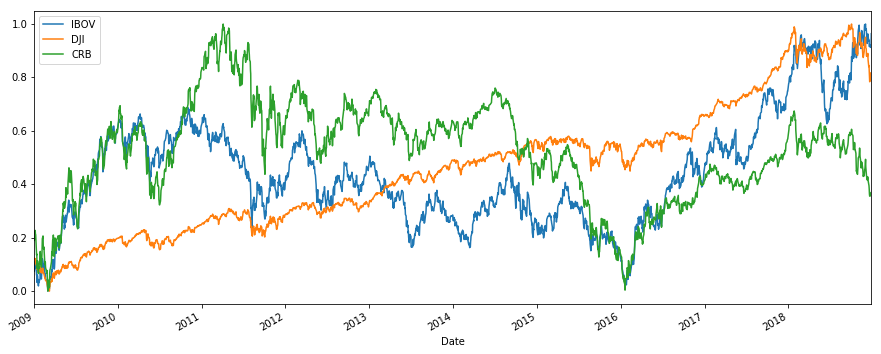

In [16]:
df_normalized.plot()

In [47]:
joesleyAudios_date ='20170517' # audios joesley batista
#pre_period = [np.min(df.index.values),np.datetime64(joesleyAudios_date)]
#post_period = [np.datetime64(joesleyAudios_date), np.max(df.index.values)]

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    62791.8            2574463.0
Prediction (s.d.)         68092.3 (2520.0)   2791783.9 (103322.0)
95% CI                    [63169.4, 73047.8] [2589945.9, 2994960.7]

Absolute effect (s.d.)    -5300.5 (2520.0)   -217320.9 (103322.0)
95% CI                    [-10256.0, -377.6] [-420497.7, -15482.9]

Relative effect (s.d.)    -7.8% (3.7%)       -7.8% (3.7%)
95% CI                    [-15.1%, -0.6%]    [-15.1%, -0.6%]

Posterior tail-area probability p: 0.016
Posterior prob. of a causal effect: 98.40%

For more details run the command: print(impact.summary('report'))


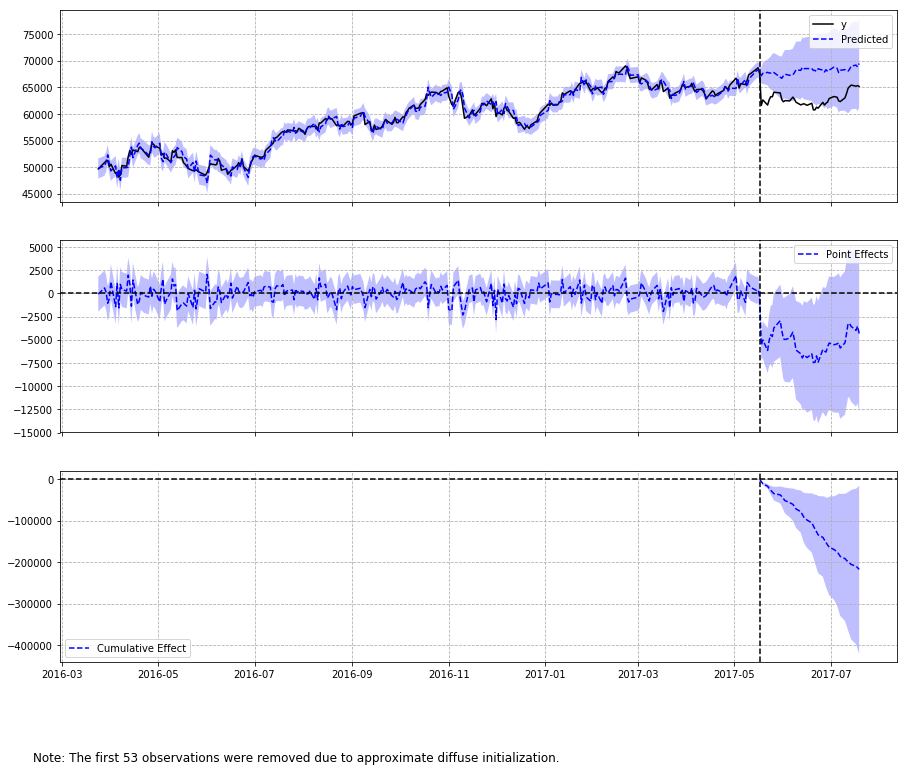

In [48]:
pre_period = ['20160104', joesleyAudios_date]
post_period = ['20170518', '20170719']

ci = CausalImpact(df, pre_period, post_period, prior_level_sd=None, nseasons=[{'period': 52}])

print(ci.summary())
ci.plot()

In [49]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 62791.8. By contrast, in the absence of an
intervention, we would have expected an average response of 68092.3.
The 95% interval of this counterfactual prediction is [63169.4, 73047.8].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -5300.5 with a 95% interval of
[-10256.0, -377.6]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 2574463.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 2791783.9. The 95% interval of this prediction is [2589945.9, 2994960.7].


The above results are given in terms of absolute numbers. In relative
